In [130]:
import sqlite3 as sqlite
import pandas as pd

con = sqlite.connect('../data/checking-logs.sqlite')

In [131]:
query = '''
    SELECT
        CAST(strftime('%H', timestamp) as INT) as hour,
        count(*) as commits,
        strftime('%w', timestamp) NOT IN ('6', '0') as is_wd
    FROM checker
    WHERE uid LIKE 'user_%' 
    GROUP BY hour, is_wd
'''
df = pd.read_sql(query, con, parse_dates=['datetime'])
df

,hour,commits,is_wd
0,0,6,0
1,0,6,1
2,1,6,0
3,3,1,0
4,3,2,1
5,5,2,0
6,5,15,1
7,6,3,1
8,7,16,0
9,7,31,1


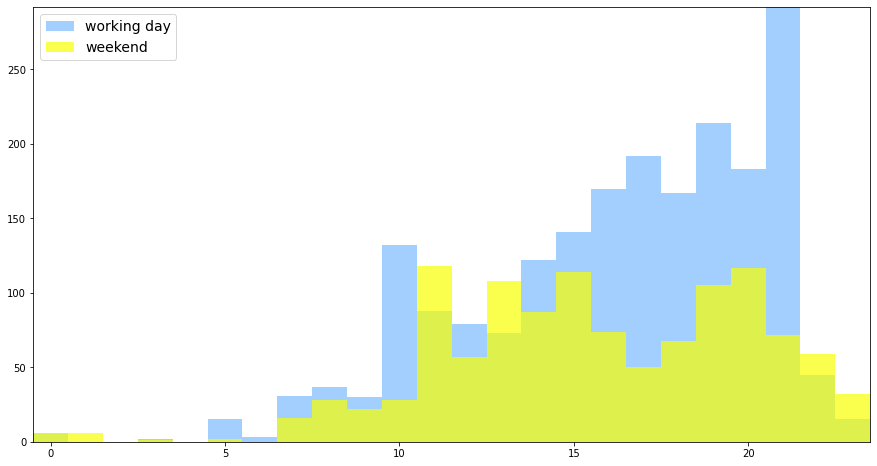

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt

weekend = df[df['is_wd'] == 0].set_index('hour')['commits']
working_days = df[df['is_wd'] == 1].set_index('hour')['commits']
data = pd.DataFrame({'weekend':weekend,'working_day': working_days}, index=range(24))
data.index.rename('hour', inplace=True)
data.fillna(0)

fig, ax = plt.subplots()

ax.bar(range(24), data['working_day'], alpha=0.7, label='working day', width=1, color='#7dbbff')
ax.bar(range(24), data['weekend'], alpha=0.7, label='weekend', width=1, color='#f7ff00')

fig.set_figwidth(15)
fig.set_figheight(8)
ax.margins(0,0)

plt.legend(loc='upper left', fontsize=14)
plt.show()

Is the dynamic different on working days and weekends? 
11 - weekend
21 - working day

In [133]:
con.close()